In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_excel(r"Data_Train.xlsx")
test_data = pd.read_excel(r"Test_set.xlsx")

In [4]:
train_data.head()
#Price is dependent variable here

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_data['Duration'].value_counts()
#duration is string format

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
4h 10m       1
19h 50m      1
32h 55m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [9]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA


In [11]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
train_data['Journey_weekday'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.weekday

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
test_data['Journey_weekday'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.weekday

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [13]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

train_data['Arr_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arr_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

test_data['Arr_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arr_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [14]:
train_data.drop(['Dep_Time'],axis=1, inplace=True)
test_data.drop(['Dep_Time'],axis=1, inplace=True)
train_data.drop(['Arrival_Time'],axis=1, inplace=True)
test_data.drop(['Arrival_Time'],axis=1, inplace=True)


In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35


In [16]:
#duration to min
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train_data['Duration']=train_data['Duration'].apply(duration)
test_data['Duration']=test_data['Duration'].apply(duration)

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,4,16,50,21,35


In [18]:
#converting categorical stops to no.
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,6,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,6,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,4,16,50,21,35


In [20]:
train_data['Dep_time']=train_data['Dep_hour']
test_data['Dep_time']=test_data['Dep_hour']
train_data['Arr_time']=train_data['Arr_hour']
test_data['Arr_time']=test_data['Arr_hour']

In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,Dep_time,Arr_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,6,22,20,1,10,22,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2,5,50,13,15,5,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,6,9,25,4,25,9,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,6,18,5,23,30,18,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,4,16,50,21,35,16,21


In [22]:
#Categorising departure and arrival time
def deparrtime(x):
    tt=x
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train_data['Dep_time']=train_data['Dep_time'].apply(deparrtime)
train_data['Arr_time']=train_data['Arr_time'].apply(deparrtime)
test_data['Dep_time']=test_data['Dep_time'].apply(deparrtime)
test_data['Arr_time']=test_data['Arr_time'].apply(deparrtime)

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,Dep_time,Arr_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,6,22,20,1,10,Night,Night
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2,5,50,13,15,Morning,Afternoon
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,6,9,25,4,25,Morning,Night
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,6,18,5,23,30,Evening,Night
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,4,16,50,21,35,Evening,Night


# Preprocessing using One hot Encoding


In [24]:
%matplotlib inline

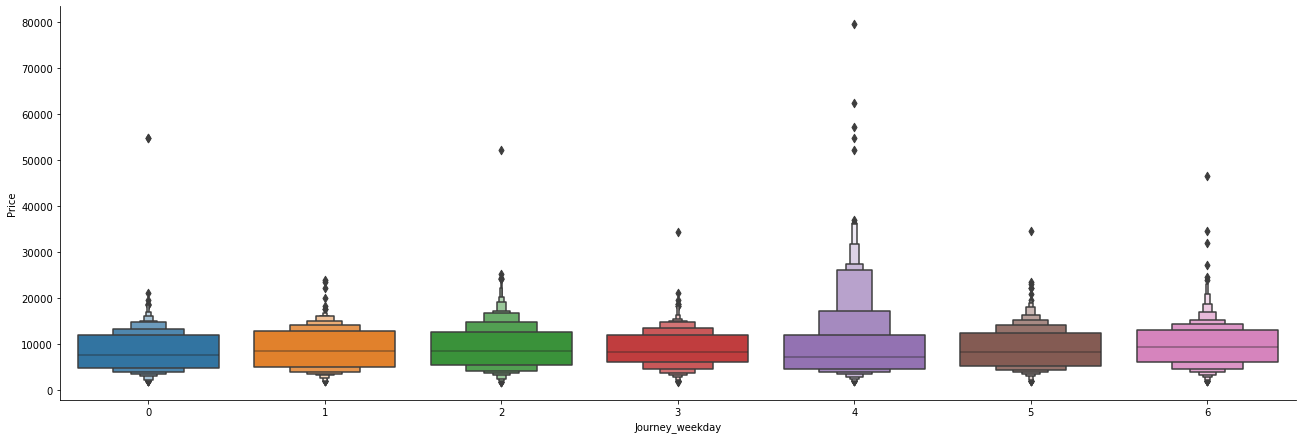

In [25]:
#price vs weekday
sns.catplot(y="Price",x="Journey_weekday", data=train_data.sort_values("Price", ascending=False),kind="boxen",height=6,aspect=3)

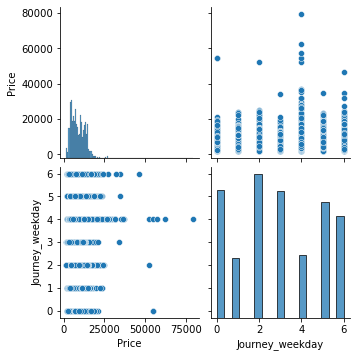

In [26]:
sns.pairplot(data=train_data,vars=['Price','Journey_weekday'])

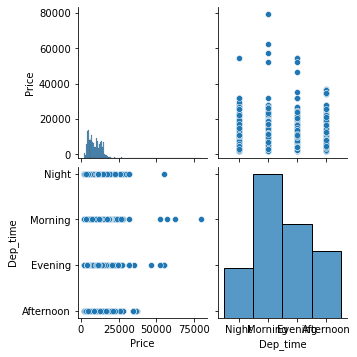

In [27]:
sns.pairplot(data=train_data,vars=['Price','Dep_time'])

In [28]:
#Label encoding is for ordered data as it provides priority basis to the training data
train_data.replace({"Night":0,"Afternoon":1,"Evening":2,"Morning":3},inplace=True)
test_data.replace({"Night":0,"Afternoon":1,"Evening":2,"Morning":3},inplace=True)

In [29]:
train_data['Journey_weekday'].replace({0:0,1:0,2:0,3:0,4:0,5:1,6:1},inplace=True)
test_data['Journey_weekday'].replace({0:0,1:0,2:0,3:0,4:0,5:1,6:1},inplace=True)

In [30]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,Dep_time,Arr_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,1,22,20,1,10,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,0,5,50,13,15,3,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,1,9,25,4,25,3,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,1,18,5,23,30,2,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,0,16,50,21,35,2,0


In [31]:
#One hot encoding
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [32]:
Source= train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
Destination= train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)

Airline= train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True) #drop_first=True makes us drop main column after getting 
Airline.head()  

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [36]:
Airline= test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

Source= test_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

Destination= test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()
test=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [37]:
test.drop(["Airline","Source","Destination","Route","Additional_Info","Date_of_Journey"],axis=1,inplace=True)
train.drop(["Airline","Source","Destination","Route","Additional_Info","Date_of_Journey"],axis=1,inplace=True)

In [38]:
test.head()

,Duration,Total_Stops,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,Dep_time,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,0,17,30,4,25,2,...,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,1,6,20,10,20,3,...,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,0,19,15,19,0,2,...,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,0,8,0,21,0,3,...,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,0,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,1,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,0,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,1,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,1,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,0,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [40]:
from sklearn import preprocessing

In [41]:
 #standardizing for duration as it is varying much


In [42]:
X=train.drop(["Price"],axis=1)
Y=train["Price"]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

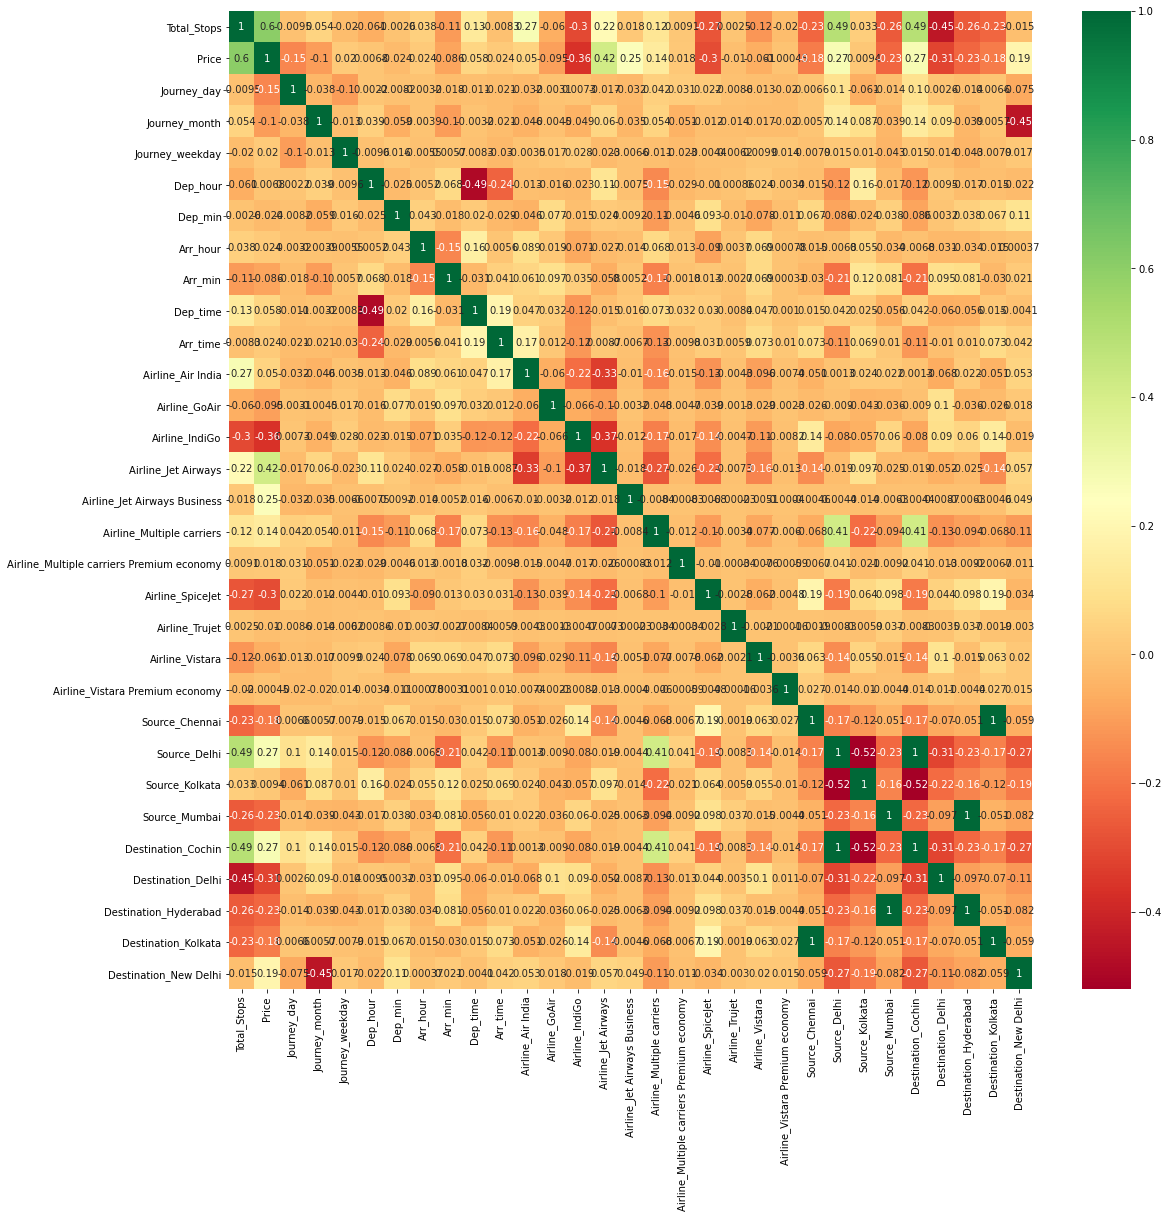

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")

In [51]:
#extract important features
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,Y)
print(selection.feature_importances_)

[1.07707313e-01 2.49117927e-01 1.27810983e-01 5.23307428e-02
 1.49623246e-02 2.06837302e-02 2.41579743e-02 2.37931694e-02
 1.94620598e-02 1.20560699e-02 1.05376772e-02 9.01921712e-03
 2.07244491e-03 1.94630948e-02 1.35380968e-01 6.72596802e-02
 1.77666326e-02 8.35451489e-04 3.31232971e-03 1.16152204e-04
 4.94811528e-03 6.76287572e-05 5.69312462e-04 1.21812562e-02
 3.29124726e-03 7.50159222e-03 8.67952093e-03 1.32323331e-02
 6.86075555e-03 4.77074765e-04 2.43452222e-02]


<AxesSubplot:>

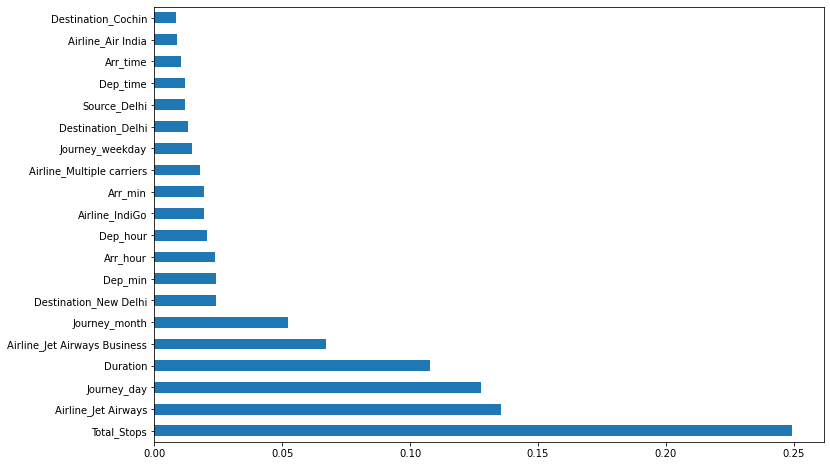

In [52]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

# Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [56]:
len(X_train)

8545

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = ["Duration" , "Journey_day" , "Journey_month" , "Dep_hour" , "Dep_min" , "Arr_hour" , "Arr_min"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

<ipython-input-57-8349a15e7e98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
S:\anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-57-8349a15e7e98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [58]:
X_train.head()

,Duration,Total_Stops,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Arr_hour,Arr_min,Dep_time,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
4004,0.085246,1,1.590587,0.254602,0,-0.948826,0.295259,0.826686,-1.491949,3,...,0,0,1,0,0,1,0,0,0,0
2311,1.428067,2,1.590587,0.254602,0,-1.297305,0.295259,-1.366250,0.022581,3,...,0,0,1,0,0,1,0,0,0,0
954,-0.493049,1,-1.242465,1.110455,0,1.490529,1.362962,-1.366250,0.022581,0,...,0,0,1,0,0,1,0,0,0,0
9620,0.467509,1,-0.534202,1.110455,1,1.490529,1.362962,-0.196684,0.628392,0,...,0,0,1,0,0,1,0,0,0,0
7762,1.192828,2,-0.180070,1.110455,0,0.619331,1.362962,-0.050488,1.234204,2,...,0,0,0,1,0,0,0,0,0,0


In [59]:
from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

# Random Forest

In [60]:
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',rf.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.8271236639956818
train_score:  0.9554031157500724
MAE: 1202.7121489006497
MSE: 3755555.5462178793
RMSE: 1937.925578090624


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

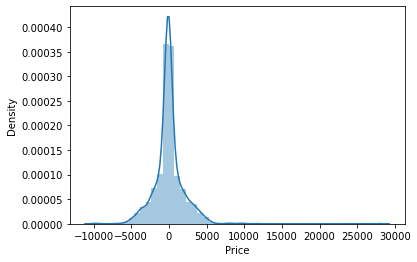

In [61]:
sns.distplot(Y_test-Y_pred)

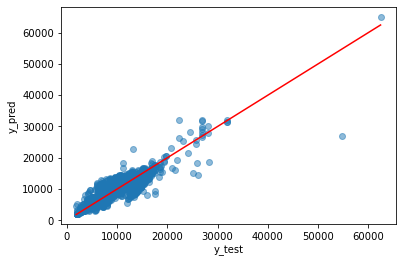

In [62]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

# Gradient Boost

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
gbm.fit(X_train,Y_train)
Y_pred=gbm.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',gbm.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.7833343338478943
train_score:  0.7928830505196415
MAE: 1474.7069677541124
MSE: 4706832.427153054
RMSE: 2169.523548420955


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

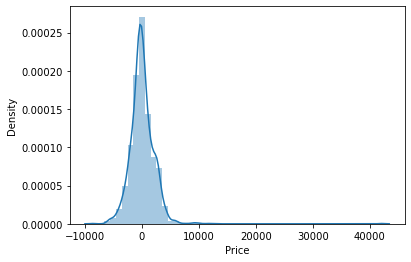

In [65]:
sns.distplot(Y_test-Y_pred)

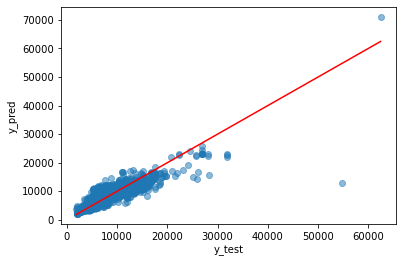

In [66]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

# XG Boost

In [67]:
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',xgb.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.8464137960969846
train_score:  0.937007971701371
MAE: 1169.096972153574
MSE: 3336497.8297325308
RMSE: 1826.6082857943381


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

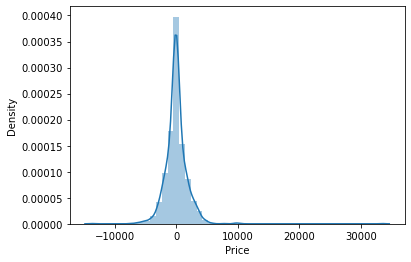

In [68]:
sns.distplot(Y_test-Y_pred)

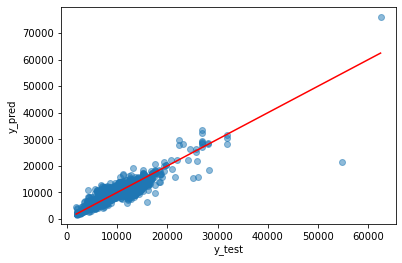

In [69]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

# Ada Boost

In [70]:
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',ada.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.33967573597528733
train_score:  0.3462982588217539
MAE: 3159.9849712808955
MSE: 14344846.202653812
RMSE: 3787.459069436106


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

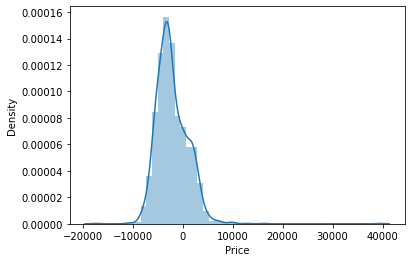

In [71]:
sns.distplot(Y_test-Y_pred)

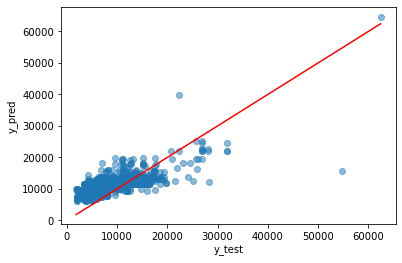

In [72]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

In [73]:
from sklearn.linear_model import LinearRegression

# Linear Regression

In [74]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',reg.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.630416069947364
train_score:  0.6237633165966106
MAE: 1927.6975558380686
MSE: 8028819.966820143
RMSE: 2833.5172430779635


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

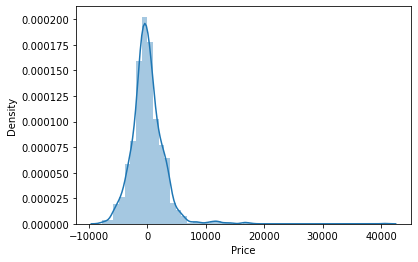

In [75]:
sns.distplot(Y_test-Y_pred)

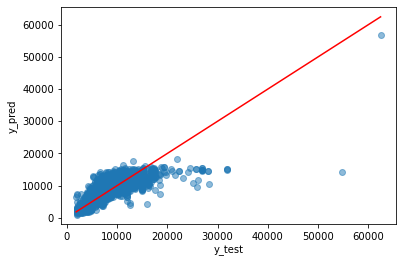

In [76]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

# KNN

In [77]:
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',knn.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2_score:  0.7392827568498479
train_score:  0.8145892379630106
MAE: 1449.576883481516
MSE: 5663806.34352831
RMSE: 2379.87527898592


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

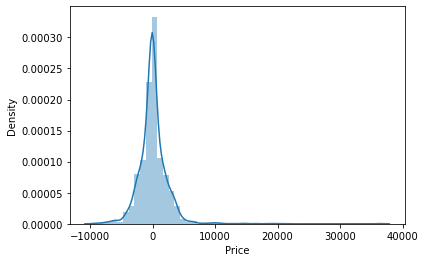

In [78]:
sns.distplot(Y_test-Y_pred)

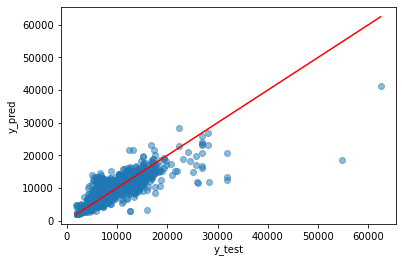

In [79]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

In [80]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [83]:
xgb_grid = GridSearchCV(xgb,parameters,cv = 2,n_jobs = 5,verbose=True)

In [82]:
xgb_grid.fit(X_train,Y_train)
Y_pred=xgb_grid.predict(X_test)
print('r2_score: ',r2_score(Y_test,Y_pred))
print('train_score: ',xgb_grid.score(X_train,Y_train))
print('MAE:',mean_absolute_error(Y_test,Y_pred))
print('MSE:',mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,Y_pred)))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:43:56] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:56] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


r2_score:  0.8591521912934033
train_score:  0.9239852628898875
MAE: 1128.795000817991
MSE: 3059769.667651225
RMSE: 1749.2197310947602


S:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

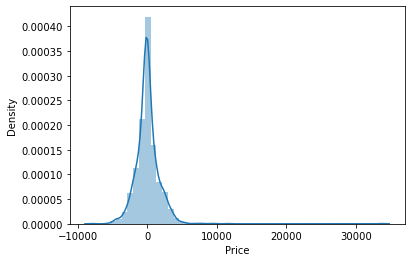

In [84]:
sns.distplot(Y_test-Y_pred)

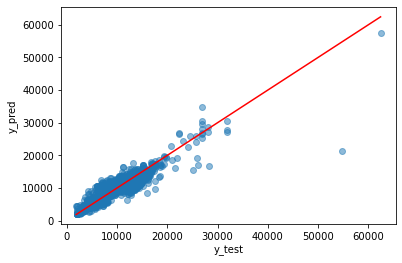

In [85]:
plt.scatter(Y_test , Y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
X = np.linspace(min(Y_test) , max(Y_test) , 100)
Y = X
plt.plot(X, Y , "-r")

In [90]:
len(Y_pred)

2137

In [91]:
final_prediction = pd.DataFrame(Y_pred, columns = ['Predicted Price'])

In [92]:
final_prediction.head()

,Predicted Price
0,3994.833984
1,10977.935547
2,12738.697266
3,11666.746094
4,9469.375977


In [93]:
final_prediction.to_csv("Kaggle fare flight prediction.csv", index= False)